# Linear Classification (Breast Cancer)

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
!nvidia-smi -L
print(f'Tensorflow version: {tf.__version__}')

GPU 0: GeForce RTX 2080 Ti (UUID: GPU-3cb47403-efa9-71ae-1700-c27de6cb0d0a)
Tensorflow version: 2.3.1


In [3]:
data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

N, D = X_train.shape

Epoch 1/100
12/12 [==============================] - 0s 10ms/step - loss: 0.8924 - accuracy: 0.4514 - val_loss: 0.8229 - val_accuracy: 0.4681
Epoch 2/100
12/12 [==============================] - 0s 2ms/step - loss: 0.8066 - accuracy: 0.5171 - val_loss: 0.7499 - val_accuracy: 0.5266
Epoch 3/100
12/12 [==============================] - 0s 3ms/step - loss: 0.7329 - accuracy: 0.5722 - val_loss: 0.6848 - val_accuracy: 0.5851
Epoch 4/100
12/12 [==============================] - 0s 2ms/step - loss: 0.6689 - accuracy: 0.6220 - val_loss: 0.6288 - val_accuracy: 0.6543
Epoch 5/100
12/12 [==============================] - 0s 2ms/step - loss: 0.6108 - accuracy: 0.6877 - val_loss: 0.5820 - val_accuracy: 0.6968
Epoch 6/100
12/12 [==============================] - 0s 2ms/step - loss: 0.5642 - accuracy: 0.7297 - val_loss: 0.5410 - val_accuracy: 0.7340
Epoch 7/100
12/12 [==============================] - 0s 2ms/step - loss: 0.5228 - accuracy: 0.7638 - val_loss: 0.5061 - val_accuracy: 0.7660
Epoch 8/100


Epoch 59/100
12/12 [==============================] - 0s 2ms/step - loss: 0.1488 - accuracy: 0.9528 - val_loss: 0.1380 - val_accuracy: 0.9734
Epoch 60/100
12/12 [==============================] - 0s 2ms/step - loss: 0.1475 - accuracy: 0.9528 - val_loss: 0.1364 - val_accuracy: 0.9734
Epoch 61/100
12/12 [==============================] - 0s 2ms/step - loss: 0.1463 - accuracy: 0.9528 - val_loss: 0.1347 - val_accuracy: 0.9734
Epoch 62/100
12/12 [==============================] - 0s 2ms/step - loss: 0.1451 - accuracy: 0.9528 - val_loss: 0.1331 - val_accuracy: 0.9734
Epoch 63/100
12/12 [==============================] - 0s 2ms/step - loss: 0.1439 - accuracy: 0.9528 - val_loss: 0.1317 - val_accuracy: 0.9734
Epoch 64/100
12/12 [==============================] - 0s 2ms/step - loss: 0.1428 - accuracy: 0.9528 - val_loss: 0.1301 - val_accuracy: 0.9734
Epoch 65/100
12/12 [==============================] - 0s 2ms/step - loss: 0.1417 - accuracy: 0.9554 - val_loss: 0.1287 - val_accuracy: 0.9734
Epoch 

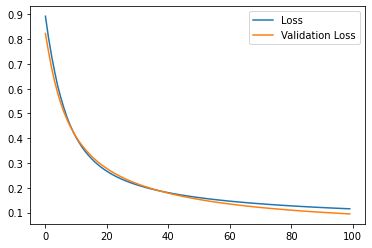

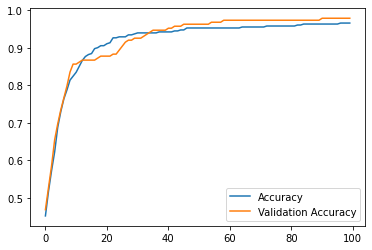

6/6 [==============================] - 0s 992us/step - loss: 0.0948 - accuracy: 0.9787
Accuracy: 0.978723406791687


In [4]:
i = tf.keras.layers.Input(shape=(D,))
x = tf.keras.layers.Dense(1, activation='sigmoid')(i)
model = tf.keras.models.Model(i, x)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

r = model.fit(X_train, y_train,
              validation_data=(X_test, y_test),
              epochs=100)

plt.plot(r.history.get('loss'), label='Loss')
plt.plot(r.history.get('val_loss'), label='Validation Loss')
plt.legend()
plt.show()

plt.plot(r.history.get('accuracy'), label='Accuracy')
plt.plot(r.history.get('val_accuracy'), label='Validation Accuracy')
plt.legend()
plt.show()

print(f'Accuracy: {model.evaluate(X_test, y_test)[1]}')

## Save & load the model

In [5]:
model.save('models/linear_classification.h5')
model_loaded = tf.keras.models.load_model('models/linear_classification.h5')
print(f'Accuracy of the loaded model: {model_loaded.evaluate(X_test, y_test)[1]}')

6/6 [==============================] - 0s 909us/step - loss: 0.0948 - accuracy: 0.9787
Accuracy of the loaded model: 0.978723406791687
